# **From facial emotion recognition to emoji**
# CNN Model



# Load necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import pickle
from sklearn.metrics import confusion_matrix

# Prepare train set and test set

In [3]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
# load the data-dict containing the dataset
link_dataset = '/content/drive/MyDrive/CAS ADS 2022 - projects/Final project/Dataset_balanced.pickle'
with open(link_dataset, 'rb') as handle: 
    data_dict = pickle.load(handle)

# Extract the data from the data_dict
X_train = data_dict['X_train']
X_test = data_dict['X_test']
y_train = data_dict['y_train']
y_test = data_dict['y_test']

# Build the CNN model

In [53]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf 


# Define the model architecture

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten()) # Flatten the output of the convolutional layers
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax')) # Add a dense layer with 7 neurons (one for each class)

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                        

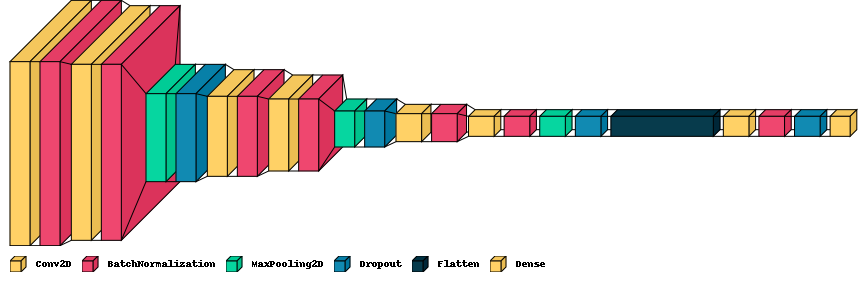

In [62]:
!pip install visualkeras
import visualkeras

# View and save model visualization
visualkeras.layered_view(model, legend=True, to_file='model visualization.png') 

In [63]:
# Download image
files.download('model visualization.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Train the model

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the callback, save the best model 
checkpoint = ModelCheckpoint(filepath='best_model8.h5', monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)

# Stop training if no improvement after 10 epochs
es = EarlyStopping(monitor='val_accuracy', patience=10)
callbacks_list = [checkpoint, es]

In [35]:
history = model.fit(
          X_train, 
          y_train, 
          epochs=50, 
          batch_size=32, 
          validation_data=(X_test, y_test),
          callbacks = callbacks_list
          )

Epoch 1/50
1532/1532 [==============================] - ETA: 0s - loss: 2.4880 - accuracy: 0.2165
Epoch 1: val_accuracy improved from -inf to 0.30524, saving model to best_model8.h5
1532/1532 [==============================] - 36s 19ms/step - loss: 2.4880 - accuracy: 0.2165 - val_loss: 1.8329 - val_accuracy: 0.3052
Epoch 2/50
1531/1532 [============================>.] - ETA: 0s - loss: 1.9989 - accuracy: 0.3045
Epoch 2: val_accuracy improved from 0.30524 to 0.38966, saving model to best_model8.h5
1532/1532 [==============================] - 28s 18ms/step - loss: 1.9989 - accuracy: 0.3044 - val_loss: 1.6286 - val_accuracy: 0.3897
Epoch 3/50
1532/1532 [==============================] - ETA: 0s - loss: 1.7560 - accuracy: 0.3665
Epoch 3: val_accuracy improved from 0.38966 to 0.43592, saving model to best_model8.h5
1532/1532 [==============================] - 28s 18ms/step - loss: 1.7560 - accuracy: 0.3665 - val_loss: 1.5066 - val_accuracy: 0.4359
Epoch 4/50
1530/1532 [=====================

In [36]:
# Download model

from google.colab import files
files.download('best_model8.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 # Evaluating the model

In [66]:
# Load saved best model
model = load_model('/content/drive/MyDrive/CAS ADS 2022 - projects/Final project/best_model8.h5')

In [48]:
# Show test loss and accuracy of the best model
test_loss, test_acc = model.evaluate(X_test, y_test)
print ('Test loss:', test_loss)
print ('Test accuracy:', test_acc)

225/225 [==============================] - 2s 7ms/step - loss: 1.3353 - accuracy: 0.6099
Test loss: 1.3353145122528076
Test accuracy: 0.6099191904067993


225/225 [==============================] - 1s 4ms/step


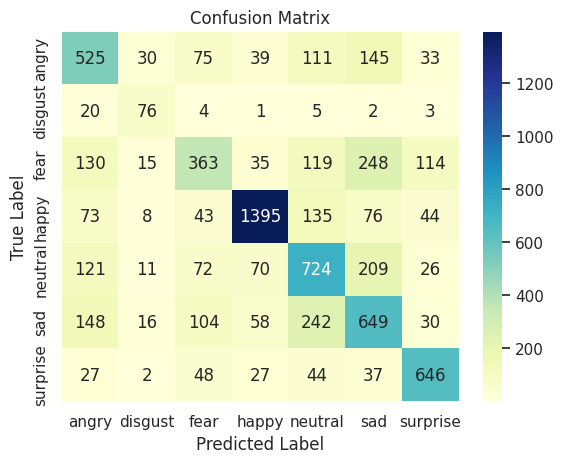

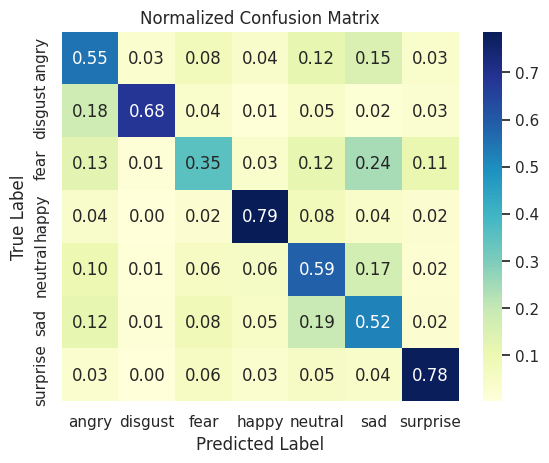

In [67]:
# Confusion matrix

import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Define labels
labels = ['angry','disgust','fear','happy','neutral','sad', 'surprise']

# Get predictions from the trained model on the validation set
y_pred = model.predict(X_test)

# Convert one-hot encoded vectors to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Normalise the confusion matrix
confusion_mtx_norm = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

sns.set()
sns.heatmap(confusion_mtx_norm, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)

plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show(block=False)

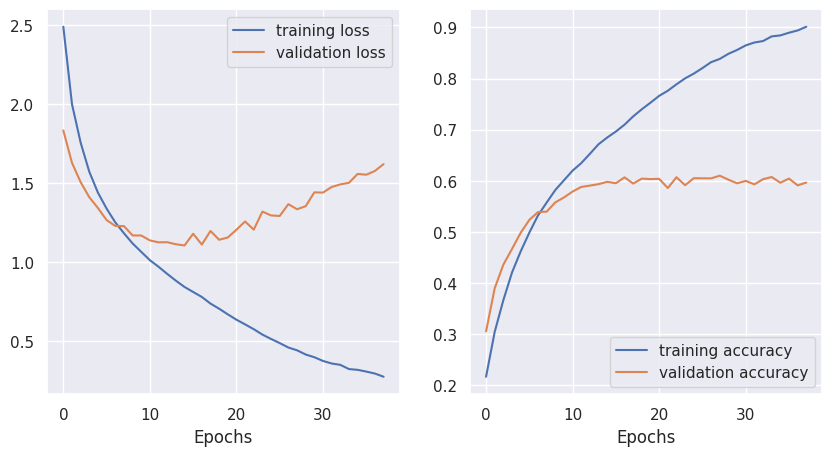

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(history.epoch, history.history['loss'])
axs[0].plot(history.epoch, history.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='upper right')
axs[0].set_xlabel('Epochs');
axs[1].plot(history.epoch, history.history['accuracy'])
axs[1].plot(history.epoch, history.history['val_accuracy'])
axs[1].set_xlabel('Epochs');

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()